# Introducing Scikit-Learn

## Data Representation in Scikit-Learn

In [4]:
import seaborn as sns
sns.set()

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a leng

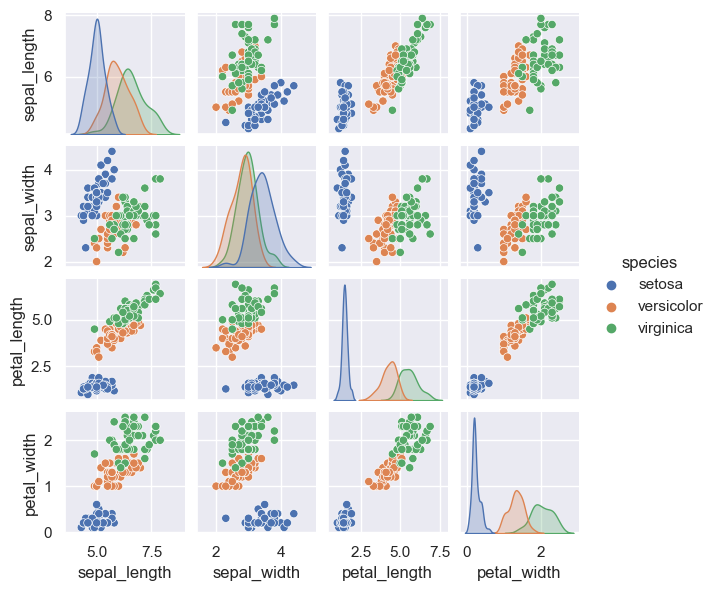

In [5]:
# visualizing iris dataset
sns.pairplot(iris,hue='species',size=1.5)

In [19]:
x_iris = iris.drop('species',axis=1)
y_iris = iris['species']

Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows:
1. Choose a class of model by importing the appropriate estimator class from Scikit-
Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
• For supervised learning, often we predict labels for unknown data using the
predict() method.
• For unsupervised learning, we often transform or infer properties of the data
using the transform() or predict() method

### Supervised learning example: Simple linear regression

In [6]:
import matplotlib.pyplot as plt
import numpy as np

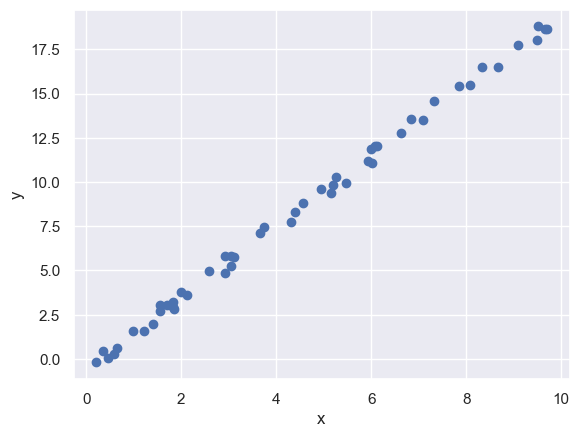

In [8]:
rng = np.random.RandomState(42)
x = 10* rng.rand(50)
y = 2* x -1 + rng.rand(50)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# Step 1: choose a class of model
from sklearn.linear_model import LinearRegression

In [10]:
# Step 2: Choose model hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
# Step 3: Arrange data into features matrix and target vector
X = x[:,np.newaxis]
X.shape

(50, 1)

In [12]:
# Step 4: Fit the model to your data
model.fit(X,y)

LinearRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[2.00660766]
-0.5350275750800026


In [15]:
# Step 5: Predict labels for unknown data
xfit = np.linspace(-1,11)
xfit = xfit[:,np.newaxis]
yfit = model.predict(xfit)

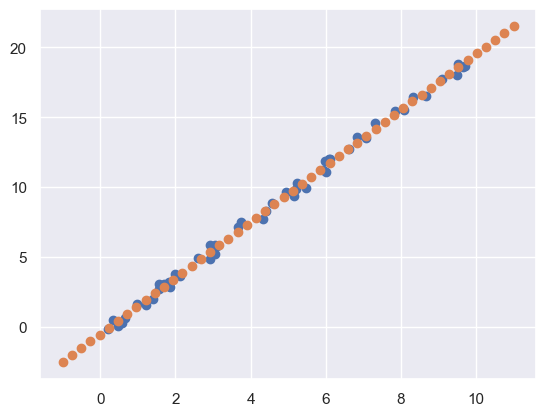

In [17]:
 # visualize the data
plt.scatter(x,y)
plt.scatter(xfit,yfit)

### Example 2: Iris  classification

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_iris.values,y_iris.values,random_state=1,test_size=0.2)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(y_test)

ValueError: could not convert string to float: 'setosa'

### Example 3 : iris dimensionality

In [26]:
from sklearn.decomposition import PCA

# model hyperparameters
model = PCA(n_components=2)

# model fit
model.fit(x_iris)

# transform the model
X_2d = model.transform(x_iris)


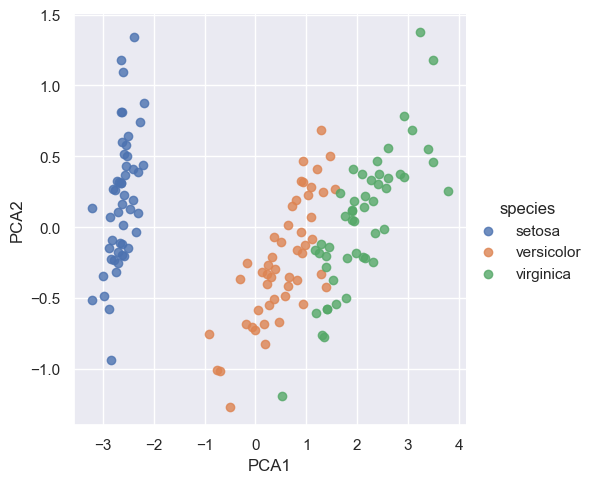

In [27]:
# plot the results
iris['PCA1'] = X_2d[:, 0]
iris['PCA2'] = X_2d[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

### Example 4 : Iris clustering - un supervised

In [28]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3,covariance_type='full')
model.fit(x_iris)

y_gmm = model.predict(x_iris)

C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


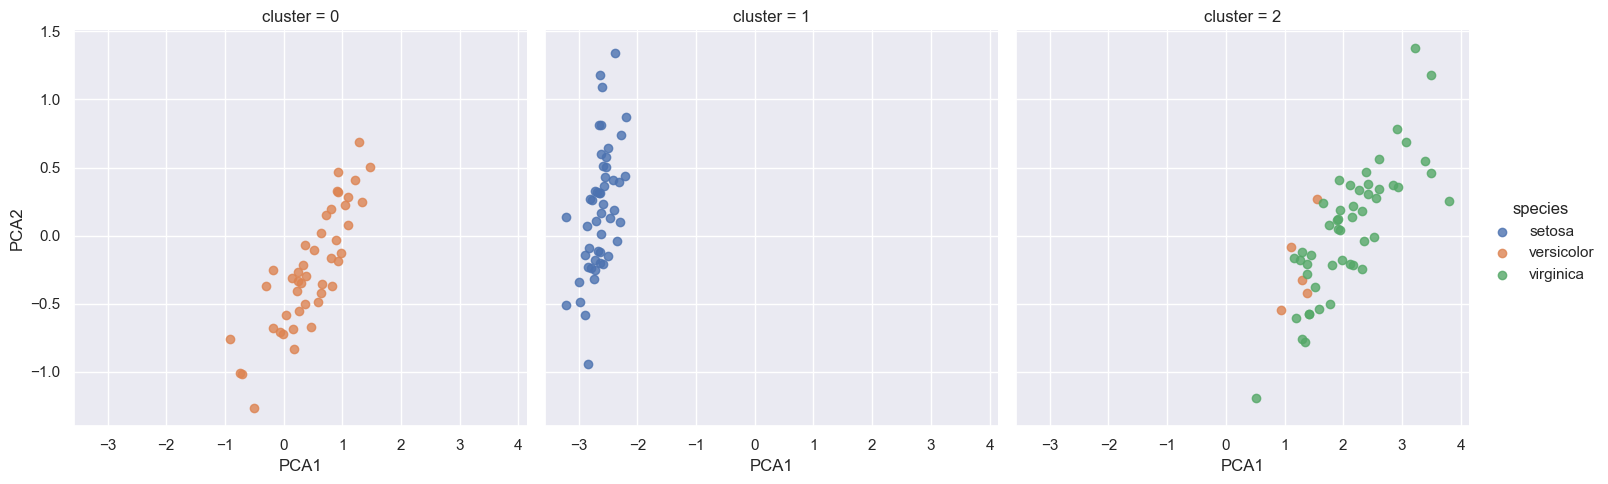

In [29]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

## Application: Exploring handwritten Digits

In [30]:
# loading and visualizing data

from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

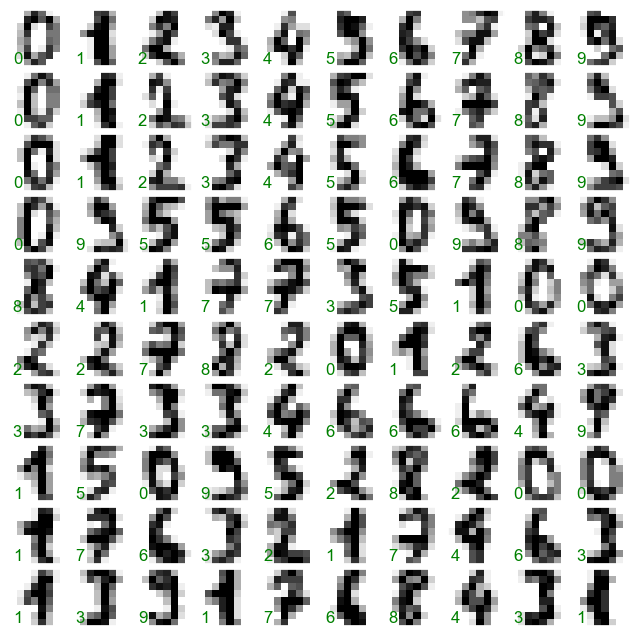

In [31]:
# visualize the images
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')


In [33]:
# splitting into 2 d data: [n_samples, n_features]
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [35]:
# dimension reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


C:\Users\wambua\AppData\Local\Temp\ipykernel_25368\825192393.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 10))


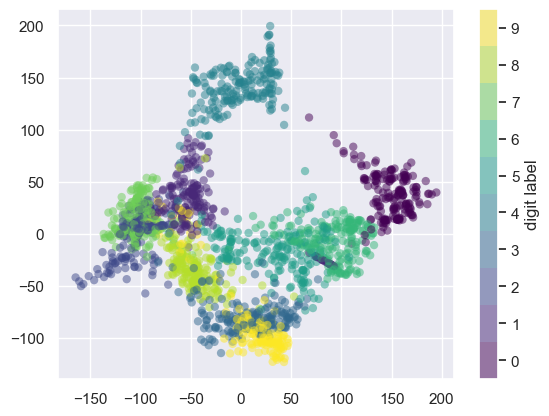

In [36]:
# plot the data
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [38]:
# classification on digits
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
#
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

ValueError: Found input variables with inconsistent numbers of samples: [30, 450]